# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
          

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("End")


# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | bilibino
Processing record 1 | chernyshevskiy
Processing record 2 | nabire
Processing record 3 | hermanus
Processing record 4 | sangar
Processing record 5 | tiksi
Processing record 6 | rikitea
Processing record 7 | busselton
Processing record 8 | punta arenas
Processing record 9 | qaanaaq
Processing record 10 | kavieng
Processing record 11 | saskylakh
Processing record 12 | nanortalik
Processing record 13 | mataura
Processing record 14 | port elizabeth
Processing record 15 | kaitangata
Processing record 16 | manokwari
Processing record 17 | hobart
Processing record 18 | marcona
City not found. Skipping...
Processing record 19 | dikson
Processing record 20 | nortelandia
Processing record 21 | severo-kurilsk
Processing record 22 | la ronge
Processing record 23 | attawapiskat
City not found. Skipping...
Processing record 24 | flinders
Processing record 25 | tuatapere
Processing record 26 | belushya guba
City no

Processing record 227 | thinadhoo
Processing record 228 | geraldton
Processing record 229 | mwene-ditu
Processing record 230 | victoria
Processing record 231 | luanda
Processing record 232 | kayes
Processing record 233 | butaritari
Processing record 234 | macusani
Processing record 235 | salinas
Processing record 236 | batticaloa
Processing record 237 | neryungri
Processing record 238 | cleethorpes
Processing record 239 | castro
Processing record 240 | lompoc
Processing record 241 | alofi
Processing record 242 | faanui
Processing record 243 | fairbanks
Processing record 244 | umm ruwabah
City not found. Skipping...
Processing record 245 | basco
Processing record 246 | maumere
Processing record 247 | avera
Processing record 248 | mana
Processing record 249 | hambantota
Processing record 250 | ugoofaaru
Processing record 251 | viedma
Processing record 252 | akyab
City not found. Skipping...
Processing record 253 | lusambo
Processing record 254 | grand river south east
City not found. Ski

Processing record 458 | lasa
Processing record 459 | tubruq
City not found. Skipping...
Processing record 460 | cagayan de tawi-tawi
City not found. Skipping...
Processing record 461 | waipawa
Processing record 462 | vaitape
Processing record 463 | farafangana
Processing record 464 | nelson
Processing record 465 | tilichiki
Processing record 466 | jiuquan
Processing record 467 | utiroa
City not found. Skipping...
Processing record 468 | vilyuysk
Processing record 469 | cayenne
Processing record 470 | valleyview
Processing record 471 | mount isa
Processing record 472 | codrington
Processing record 473 | barcelos
Processing record 474 | nuuk
Processing record 475 | shelburne
Processing record 476 | saint-augustin
Processing record 477 | ukiah
Processing record 478 | aquidauana
Processing record 479 | burica
City not found. Skipping...
Processing record 480 | henties bay
Processing record 481 | pau
Processing record 482 | alexandria
Processing record 483 | hildburghausen
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Output to data file previously defined (Note: I'm not sure why I can't save the output?)
# cleanWeather.to_csv(output_data_file)

# Display counts of each column
cleanWeather.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [9]:
# Display the final dataframe
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bilibino,36,RU,1544727781,0,68.06,166.44,-33.39,2.37
1,Chernyshevskiy,68,RU,1544727785,72,63.01,112.47,5.72,9.98
2,Nabire,32,ID,1544727785,96,-3.36,135.5,68.41,1.7
3,Hermanus,0,ZA,1544727786,66,-34.42,19.24,62.42,4.05
4,Sangar,80,RU,1544727786,32,63.92,127.47,-22.32,9.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

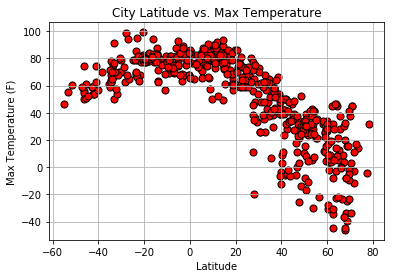

In [26]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="red",
            edgecolors = "k",s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot to folder (Note: I'm not sure why I can't save the chart?)
# plt.savefig("output_data/latVtemp.png")

#### Latitude vs. Humidity Plot

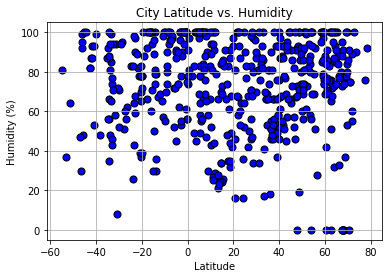

In [25]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="blue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot to folder (Note: I'm not sure why I can't save the chart?)
#plt.savefig("output_data/latVhum.png")

#### Latitude vs. Cloudiness Plot

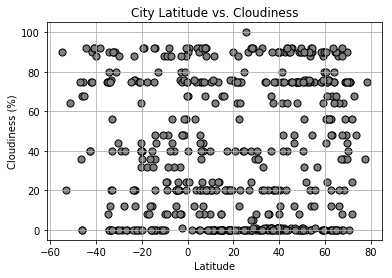

In [27]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="grey",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot to folder (Note: I'm not sure why I can't save the chart?)
# plt.savefig("output_data/latVcloud.png")

#### Latitude vs. Wind Speed Plot

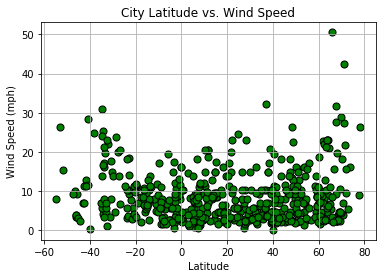

In [28]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="green",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save scatter plot to folder (Note: I'm not sure why I can't save the chart?)
# plt.savefig("output_data/latVwind.png")